# Quantum walk on a line

This section is based on the paper [Quantum Walk on a Line with Two Entangled Particles](https://arxiv.org/pdf/quant-ph/0411065).

In [59]:
import numpy as np
import matplotlib.pyplot as plt


# Constants definition
H = 1/np.sqrt(2) * np.matrix([
    [1, 1],
    [1, -1]
])

SPIN_UP = np.array([1, 0])
SPIN_DOWN = np.array([0, 1])

def hadamard_coin_qw(particle):
    for position in range(-N, N+1):
        particle[position] = H.dot(particle[position])
    
    new_particle = np.zeros((2*N+1, 2))
    
    for position in range(-N, N+1):
        if particle[position][0] != 0:
            new_particle[position+1][0] += particle[position][0]
        if particle[position][1] != 0:
            new_particle[position-1][1] += particle[position][1]
    return new_particle

In [69]:
# Initial conditions

N = 80  # Number of steps

C = H  # Coin operator

particle = np.zeros((2*N+1, 2))
particle[0] = SPIN_UP

In [70]:
for t in range(N):
    particle = hadamard_coin_qw(particle)

prob_amplitudes = np.zeros(2*N+1)

for position in range(-N, N+1):
    c = particle[position]
    prob_amplitudes[position] = abs(c.conj().dot(c))**2

# Reorder the data
prob_amplitudes = np.concatenate([prob_amplitudes[-N:], prob_amplitudes[0:N+1]])

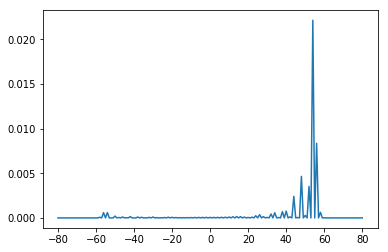

In [71]:
plt.plot(range(-N, N+1), prob_amplitudes)